In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')

In [3]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [5]:
#Assignment 4.1. Find countries in which lifeExpectancy is lower than 40 AND population is larger than 50 million

In [9]:
newdf= gapminder[(gapminder["lifeExp"]<40)&(gapminder["pop"]>50000000)]

In [12]:
gapminder[(gapminder["lifeExp"]<40)&(gapminder["pop"]>50000000)]


,country,continent,year,lifeExp,pop,gdpPercap
97,Bangladesh,Asia,1957,39.348,51365468,661.637458
696,India,Asia,1952,37.373,372000000,546.565749
708,Indonesia,Asia,1952,37.468,82052000,749.681655
709,Indonesia,Asia,1957,39.918,90124000,858.900271


In [11]:
#Assignment 4.2. Order the gapminder dataset by life expectancy (descending order)

In [15]:
gapminder.sort_values(by=['lifeExp'],ascending=False)

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
802,Japan,Asia,2002,82.000,127065841,28604.591900
695,Iceland,Europe,2007,81.757,301931,36180.789190
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736
36,Angola,Africa,1952,30.015,4232095,3520.610273
552,Gambia,Africa,1952,30.000,284320,485.230659
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [17]:
#Assignment 4.3. Plot the evolution of life expectancy, population and GDP per capita of United Kingdom

Text(0.5, 1.0, 'Evolution of life expectancy')

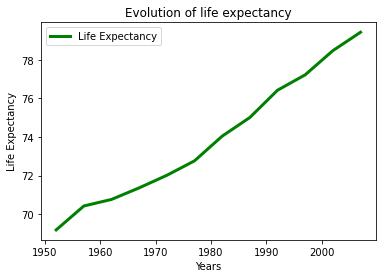

In [38]:
gapminder[gapminder['country']=='United Kingdom'].plot('year','lifeExp', color='green',  linewidth = 3, label = "Life Expectancy")
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Evolution of life expectancy')

In [54]:
uk= gapminder[gapminder['country']=='United Kingdom'][['lifeExp','gdpPercap']]
uk


,lifeExp,gdpPercap
1596,69.180,9979.508487
1597,70.420,11283.177950
1598,70.760,12477.177070
1599,71.360,14142.850890
1600,72.010,15895.116410
1601,72.760,17428.748460
1602,74.040,18232.424520
1603,75.007,21664.787670
1604,76.420,22705.092540
1605,77.218,26074.531360


Text(-9.075000000000003, 0.5, 'GDP per Capita')

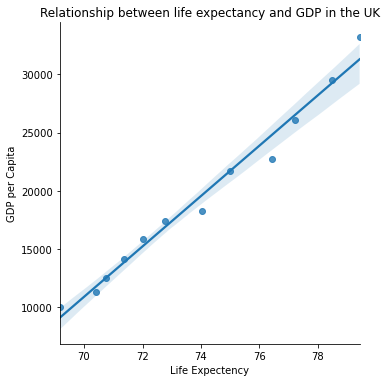

In [75]:
sns.lmplot(x="lifeExp", y="gdpPercap", data=uk)
plt.title('Relationship between life expectancy and GDP in the UK')
# Set x-axis label
plt.xlabel('Life Expectency')
# Set y-axis label
plt.ylabel('GDP per Capita')
     

In [58]:
import statsmodels.formula.api as sm
result = sm.ols(formula="lifeExp ~ gdpPercap", data=uk).fit()


In [48]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     487.2
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           8.17e-10
Time:                        17:26:05   Log-Likelihood:                -7.6772
No. Observations:                  12   AIC:                             19.35
Df Residuals:                      10   BIC:                             20.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1486      0.423    153.963      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 0, 'GDPPerCap')

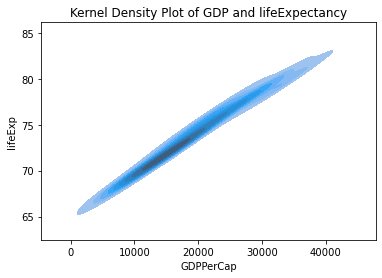

In [82]:
g= sns.kdeplot(x=uk['gdpPercap'],y=uk['lifeExp'],shade=True) 
g.set_title('Kernel Density Plot of GDP and lifeExpectancy')
g.set_xlabel('GDPPerCap')

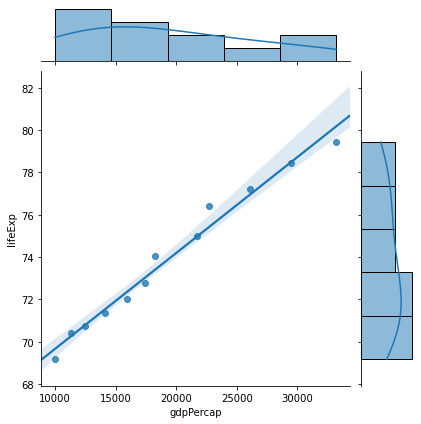

In [83]:
sns.jointplot(x="gdpPercap", y="lifeExp", data=uk, kind="reg", truncate=False)